**STUDENT CLUSTER MODEL BY VISHAL**

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
# Load the data
df = pd.read_csv("student_academic_data.csv")

In [16]:
df

,Student_ID,CGPA,Attendance_Percentage,Assignments_Completed,Lab_Score
0,S001,6.5,85,15,70
1,S002,7.8,78,14,75
2,S003,8.1,92,18,80
3,S004,5.6,60,10,55
4,S005,9.2,96,20,90
5,S006,6.3,72,12,68
6,S007,7.4,88,16,73
7,S008,8.5,94,19,85
8,S009,5.8,65,11,60
9,S010,6.9,81,13,72


In [17]:
# Drop Student_ID
df=df.drop("Student_ID",axis=1)

In [18]:
df

,CGPA,Attendance_Percentage,Assignments_Completed,Lab_Score
0,6.5,85,15,70
1,7.8,78,14,75
2,8.1,92,18,80
3,5.6,60,10,55
4,9.2,96,20,90
5,6.3,72,12,68
6,7.4,88,16,73
7,8.5,94,19,85
8,5.8,65,11,60
9,6.9,81,13,72


In [19]:
# Train the KMeans model
kmeans = KMeans(n_clusters=4,random_state=0)
df['Cluster'] = kmeans.fit_predict(df)

In [20]:
df

,CGPA,Attendance_Percentage,Assignments_Completed,Lab_Score,Cluster
0,6.5,85,15,70,0
1,7.8,78,14,75,0
2,8.1,92,18,80,3
3,5.6,60,10,55,2
4,9.2,96,20,90,1
5,6.3,72,12,68,0
6,7.4,88,16,73,3
7,8.5,94,19,85,1
8,5.8,65,11,60,2
9,6.9,81,13,72,0


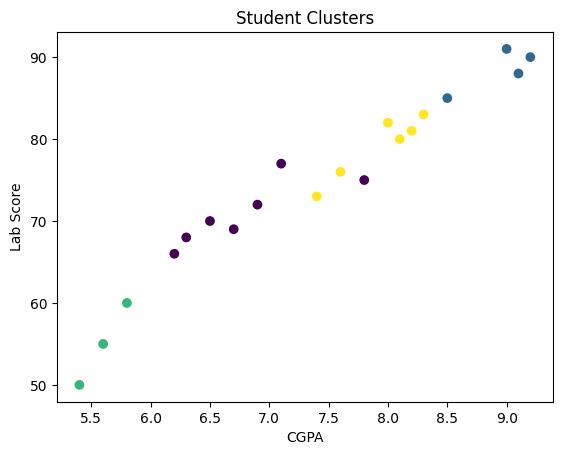

In [21]:
# Scatter plot for clusters
plt.scatter(df['CGPA'],df['Lab_Score'],c=df['Cluster'],cmap='viridis')
plt.xlabel("CGPA")
plt.ylabel("Lab Score")
plt.title("Student Clusters")
plt.show()

In [22]:
df.to_csv('Clustured.csv')

In [23]:
cluster_counts = df['Cluster'].value_counts().sort_index()

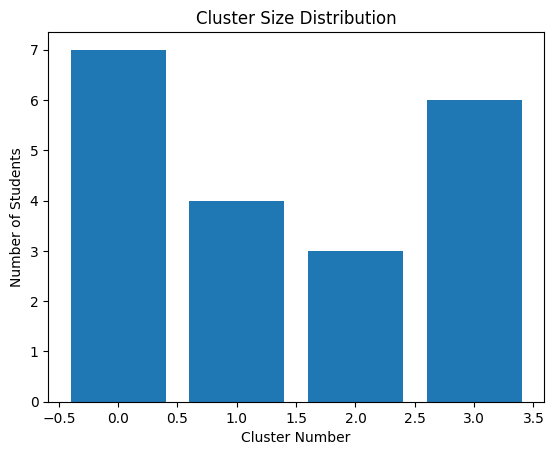

In [24]:
# Bar chart for cluster sizes
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster Number')
plt.ylabel('Number of Students')
plt.title('Cluster Size Distribution')
plt.show()

In [25]:
lab_score_sum = df.groupby('Cluster')['Lab_Score'].sum()

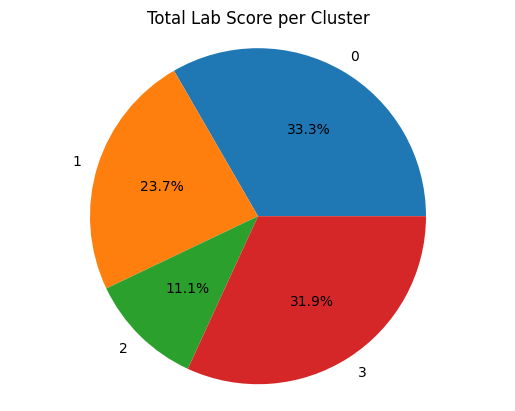

In [26]:
# Pie chart for total Lab Score per cluster
plt.pie(lab_score_sum, labels=lab_score_sum.index,autopct='%1.1f%%')
plt.title('Total Lab Score per Cluster')
plt.axis('equal')  # Keeps the pie chart circular
plt.show()

In [27]:
#Createing pickle file
import pickle
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)